In [1]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [7]:
def merge_sort(arr, k):
    if len(arr) > 1:
        # Use insertion sort if the partition size is less than or equal to k
        if len(arr) <= k:
            insertion_sort(arr)
        else:
            mid = len(arr) // 2
            L = arr[:mid]
            R = arr[mid:]

            merge_sort(L, k)
            merge_sort(R, k)

            i = 0
            j = 0
            k_index = 0

            while i < len(L) and j < len(R):
                if L[i] < R[j]:
                    arr[k_index] = L[i]
                    i += 1
                else:
                    arr[k_index] = R[j]
                    j += 1
                k_index += 1
    
            while i < len(L):
                arr[k_index] = L[i]
                i += 1
                k_index += 1
    
            while j < len(R):
                arr[k_index] = R[j]
                j += 1
                k_index += 1

In [23]:
input_sizes = list(range(2, 101))
merge_sort_times = []
insertion_sort_times = []
k_values = [5, 10, 20, 35, 50, 75]

hybrid_sort_times = {k: [] for k in k_values}

for size in input_sizes:
    arr = [random.randint(0, 1000) for _ in range(size)]

    # Run merge_sort 100 times in a row and take average time
    merge_time = timeit.timeit(lambda: [merge_sort(arr.copy(), len(arr) + 1) for _ in range(100)], number=1) / 100
    merge_sort_times.append(merge_time)

    # Run insertion_sort 100 times in a row and take average time
    insert_time = timeit.timeit(lambda: [insertion_sort(arr.copy()) for _ in range(100)], number=1) / 100
    insertion_sort_times.append(insert_time)

    for k in k_values:
        hybrid_time = timeit.timeit(lambda: [merge_sort(arr.copy(), k) for _ in range(100)], number=1) / 100
        hybrid_sort_times[k].append(hybrid_time)



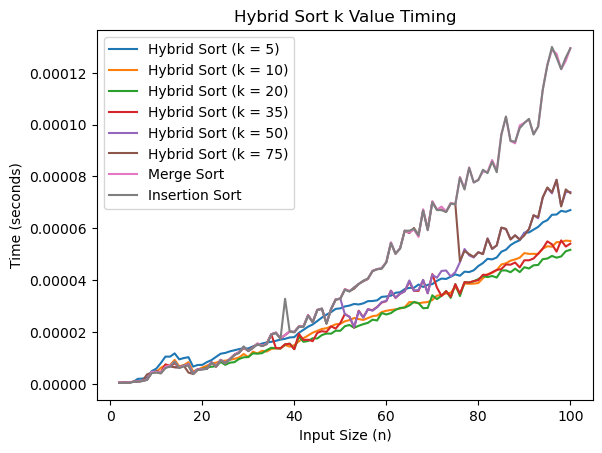

In [24]:
for k in k_values:
    plt.plot(input_sizes, hybrid_sort_times[k], label=f'Hybrid Sort (k = {k})')

plt.plot(input_sizes, merge_sort_times, label='Merge Sort')
plt.plot(input_sizes, insertion_sort_times, label='Insertion Sort')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Hybrid Sort k Value Timing')
plt.legend()
plt.show()